# Feature Engineering (FE) & EDA Assignment - Health Care Fraud Detection

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

## Data Preprocessing

· Import packages and data

· Rename column

· Change data type and transfer spending amount with dollar sign into numeric

· Understand the data strcuture.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv('inpatientCharges.csv')

In [5]:
#data.describe()
#data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   DRG Definition                        163065 non-null  object
 1   Provider Id                           163065 non-null  int64 
 2   Provider Name                         163065 non-null  object
 3   Provider Street Address               163065 non-null  object
 4   Provider City                         163065 non-null  object
 5   Provider State                        163065 non-null  object
 6   Provider Zip Code                     163065 non-null  int64 
 7   Hospital Referral Region Description  163065 non-null  object
 8    Total Discharges                     163065 non-null  int64 
 9    Average Covered Charges              163065 non-null  object
 10   Average Total Payments               163065 non-null  object
 11  Average Medic

In [6]:
data.columns = ['DRG','Provider_Id', 'Provider_Name','Provider_StreetAddress','Provider_City',
               'Provider_State','Provider_Zipcode','Hospital_referral_region_desp',
                'Total_Discharges','Average_Covered_Charges','Average_Total_Payments',
                'Average_Medicare_Payment']
data = data.drop('Average_Covered_Charges',axis=1)

In [7]:
data.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$5658.33,$4851.44


In [8]:
# Distribution plots of average total payments 
data['Average_Total_Payments'].describe()

count       163065
unique      147842
top       $4370.00
freq             9
Name: Average_Total_Payments, dtype: object

In [9]:
# Change data type and transfer spending amount with dollar sign into numeric
data['DRG'] = data['DRG'].astype('category')
data['Provider_State'] = data['Provider_State'].astype('category')
data['Provider_City'] = data['Provider_City'].astype('category')
data['Provider_Id'] = data['Provider_Id'].astype('category')
data['Average_Total_Payments'] = (data['Average_Total_Payments']
                              .str.replace(r'[^-+\d.]', '').astype(float))
data['Average_Medicare_Payment'] = (data['Average_Medicare_Payment']
                              .str.replace(r'[^-+\d.]', '').astype(float))

/var/folders/wv/hkrf4yb95rd12_wb6wjw_m7c0000gn/T/ipykernel_65706/2932651901.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  .str.replace(r'[^-+\d.]', '').astype(float))
/var/folders/wv/hkrf4yb95rd12_wb6wjw_m7c0000gn/T/ipykernel_65706/2932651901.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  .str.replace(r'[^-+\d.]', '').astype(float))


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   DRG                            163065 non-null  category
 1   Provider_Id                    163065 non-null  category
 2   Provider_Name                  163065 non-null  object  
 3   Provider_StreetAddress         163065 non-null  object  
 4   Provider_City                  163065 non-null  category
 5   Provider_State                 163065 non-null  category
 6   Provider_Zipcode               163065 non-null  int64   
 7   Hospital_referral_region_desp  163065 non-null  object  
 8   Total_Discharges               163065 non-null  int64   
 9   Average_Total_Payments         163065 non-null  float64 
 10  Average_Medicare_Payment       163065 non-null  float64 
dtypes: category(4), float64(2), int64(2), object(3)
memory usage: 9.9+ MB


## EDA

### Distribution plots

In [11]:
# Distribution plots of total discharges 
data['Total_Discharges'].describe()

count   163065.00
mean        42.78
std         51.10
min         11.00
25%         17.00
50%         27.00
75%         49.00
max       3383.00
Name: Total_Discharges, dtype: float64

<Axes: xlabel='Total_Discharges'>

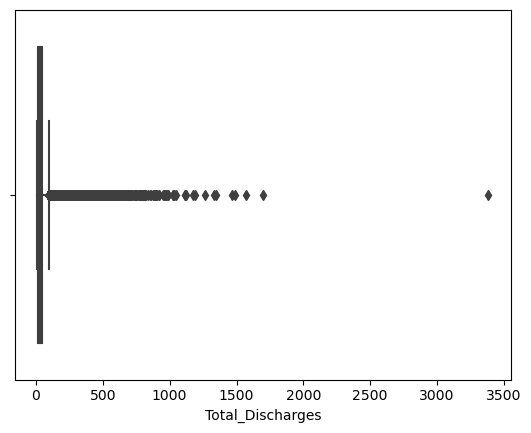

In [12]:
sns.boxplot(x = 'Total_Discharges', data = data) 

From the plot we can see 75% of the discharges are under 50, but the highest charge amounts to 3,383

In [13]:
# Distribution plots of average total payments 
data['Average_Total_Payments'].describe()

count   163065.00
mean      9707.47
std       7664.64
min       2673.00
25%       5234.50
50%       7214.10
75%      11286.40
max     156158.18
Name: Average_Total_Payments, dtype: float64

<Axes: xlabel='Average_Total_Payments'>

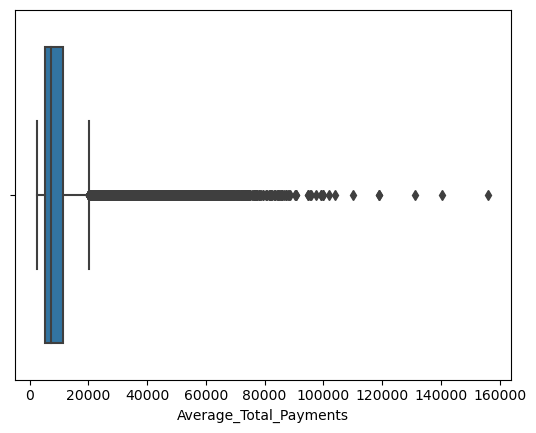

In [14]:
sns.boxplot(x = 'Average_Total_Payments', data = data) 

From the plot we can see 75% of the charges are under 10,000 dollar, but the highest charge amounts to 156,158

In [16]:
# Distribution plots of average medicare payments 
data['Average_Medicare_Payment'].describe()

count   163065.00
mean      8494.49
std       7309.47
min       1148.90
25%       4192.35
50%       6158.46
75%      10056.88
max     154620.81
Name: Average_Medicare_Payment, dtype: float64

<Axes: xlabel='Average_Medicare_Payment'>

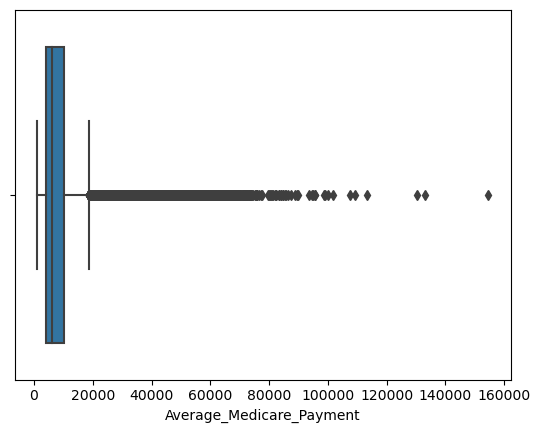

In [17]:
sns.boxplot(x = 'Average_Medicare_Payment', data = data)

From the plot we can see 75% of the charges are under 10,056 dollar, but the highest charge amounts to 154,620

### Count by State

CA    13064
TX    11864
FL    11155
NY     9178
IL     7909
PA     7804
OH     7012
MI     5419
NC     5041
GA     4968
NJ     4826
VA     4332
IN     4260
TN     4168
MO     4059
MA     3842
AL     3635
MD     3330
KY     3229
LA     3027
AZ     2851
SC     2847
WI     2834
WA     2778
OK     2520
MS     2410
MN     2252
AR     2067
CT     2011
CO     1890
IA     1734
KS     1638
WV     1589
OR     1299
NV     1202
NE     1062
NM      917
ME      888
NH      823
UT      732
RI      588
ID      551
MT      506
SD      486
DC      462
HI      442
ND      422
DE      394
VT      270
WY      247
AK      231
Name: Provider_State, dtype: int64

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='Provider_State', ylabel='count'>

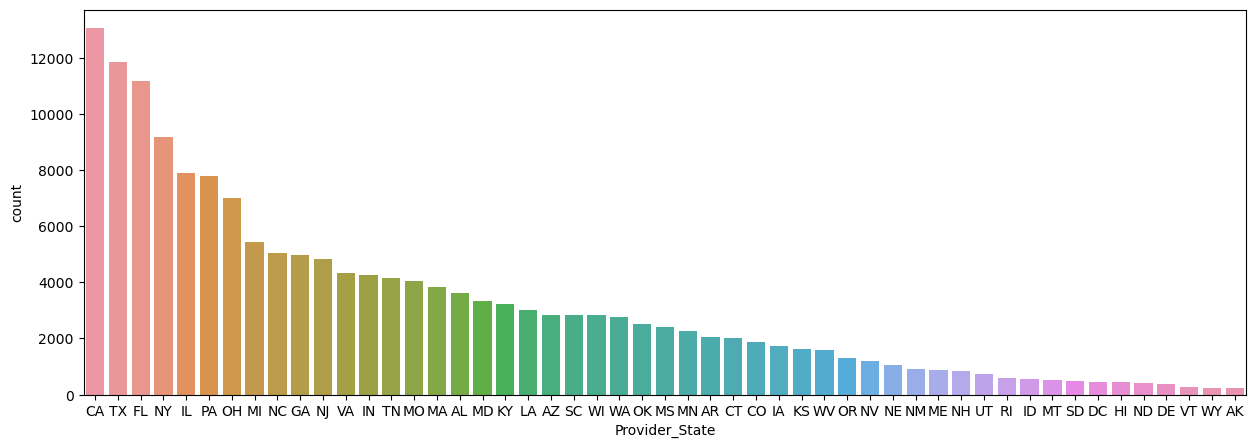

In [18]:
data['Provider_State'].value_counts()
plt.figure(figsize=(15,5))
sns.countplot(x='Provider_State',data=data,order=data['Provider_State'].value_counts().index)
plt.rcParams["axes.labelsize"] = 20

From this histogram, California, Texas, and Florid has the highest number of hospital divisions.

### Count of top 20 cities

In [19]:
data['Provider_Name'].value_counts()

GOOD SAMARITAN HOSPITAL                  633
ST JOSEPH MEDICAL CENTER                 427
MERCY MEDICAL CENTER                     357
MERCY HOSPITAL                           347
ST JOSEPH HOSPITAL                       343
                                        ... 
J PAUL JONES HOSPITAL                      1
GREATER BATON ROUGE SURGICAL HOSPITAL      1
FAIRWAY MEDICAL CENTER                     1
MONROE SURGICAL HOSPITAL                   1
EAGLEVILLE HOSPITAL                        1
Name: Provider_Name, Length: 3201, dtype: int64

<Figure size 1500x500 with 0 Axes>

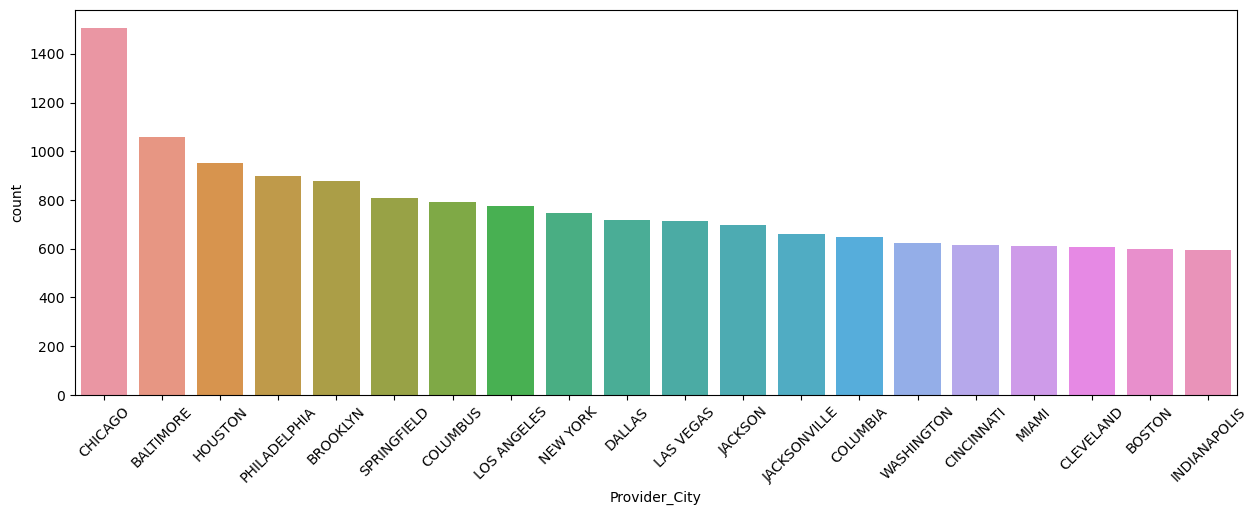

In [20]:
plt.figure(figsize=(15,5))
txt = data['Provider_City'].value_counts()[:20].index

chart = sns.countplot(
    x='Provider_City' ,data=data , order=txt
)

_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.rcParams["axes.labelsize"] = 10

### Count of top 20 DRGs

In [21]:
data['DRG'].value_counts()

194 - SIMPLE PNEUMONIA & PLEURISY W CC                                      3023
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC                             2989
292 - HEART FAILURE & SHOCK W CC                                            2953
392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC                2950
641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC    2899
                                                                            ... 
315 - OTHER CIRCULATORY SYSTEM DIAGNOSES W CC                                859
473 - CERVICAL SPINAL FUSION W/O CC/MCC                                      846
917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC                               843
251 - PERC CARDIOVASC PROC W/O CORONARY ARTERY STENT W/O MCC                 727
885 - PSYCHOSES                                                              613
Name: DRG, Length: 100, dtype: int64

<Figure size 1500x500 with 0 Axes>

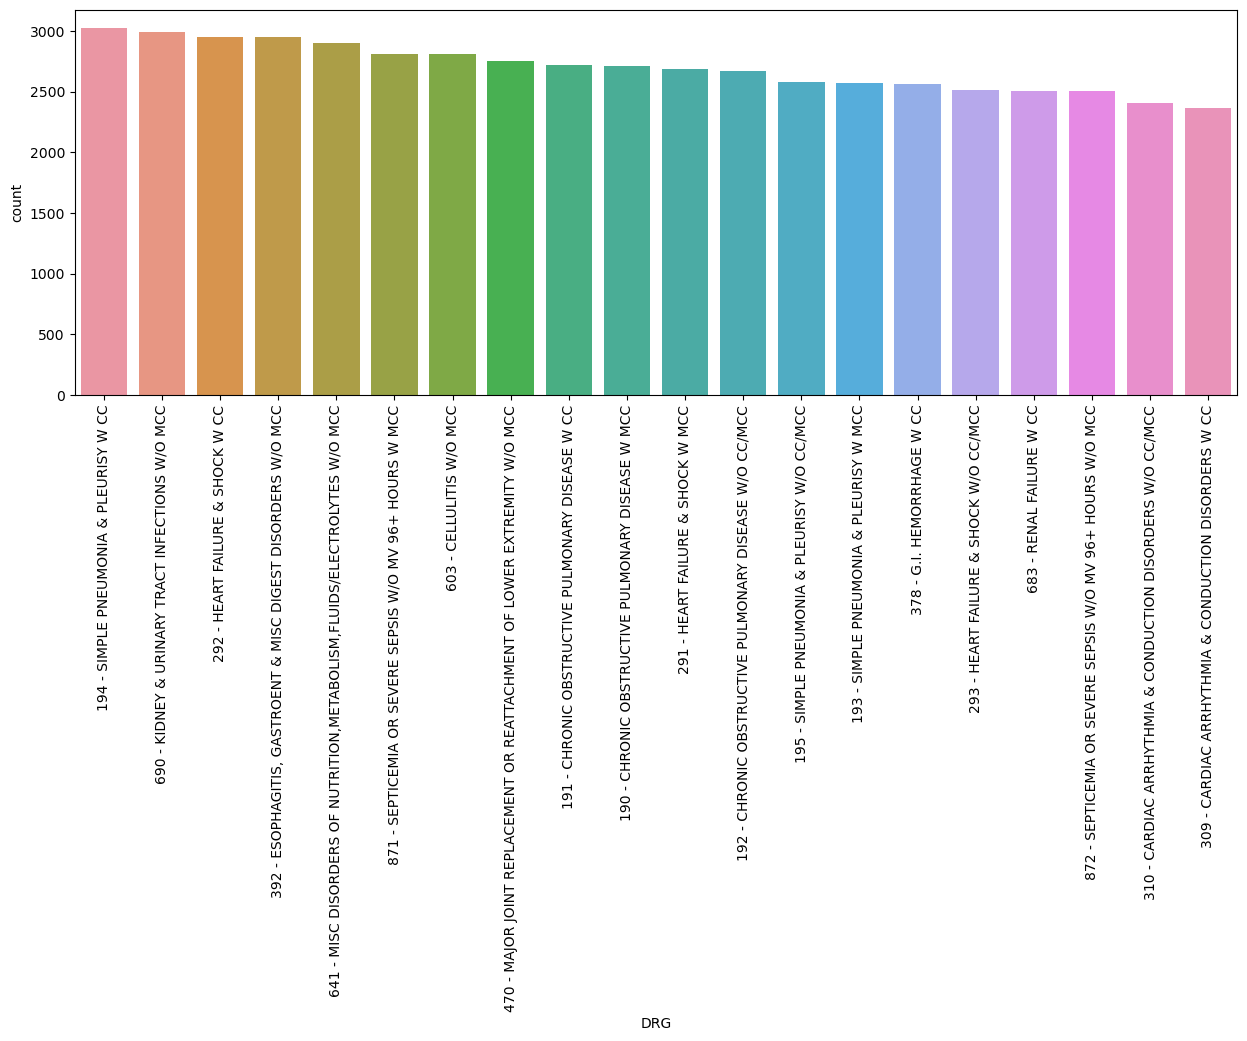

In [22]:
plt.figure(figsize=(15,5))
txt = data['DRG'].value_counts()[:20].index

chart = sns.countplot(x='DRG' ,data=data , order=txt)

_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.rcParams["axes.labelsize"] = 10

### Count of top 20 referral regions

In [23]:
data['Hospital_referral_region_desp'].value_counts()

CA - Los Angeles     3653
MA - Boston          2910
GA - Atlanta         2630
TX - Houston         2577
PA - Philadelphia    2554
                     ... 
OR - Bend              85
ID - Idaho Falls       85
WI - Neenah            83
ND - Grand Forks       80
ND - Minot             64
Name: Hospital_referral_region_desp, Length: 306, dtype: int64

<Figure size 1500x500 with 0 Axes>

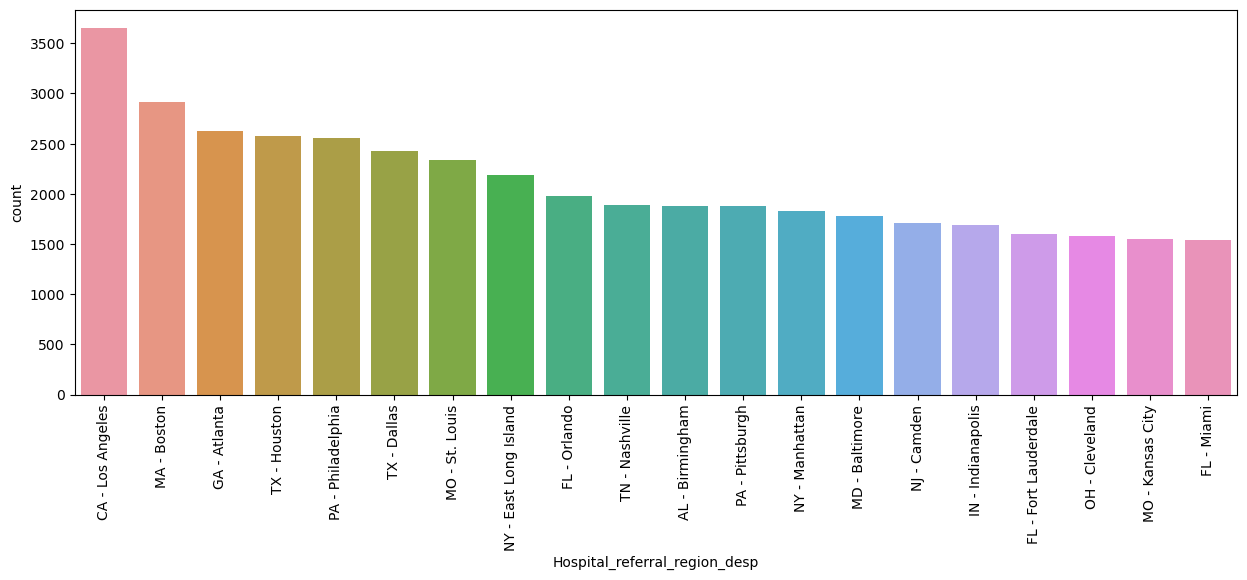

In [24]:
plt.figure(figsize=(15,5))
txt = data['Hospital_referral_region_desp'].value_counts()[:20].index

chart = sns.countplot(x='Hospital_referral_region_desp' ,data=data , order=txt)

_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.rcParams["axes.labelsize"] = 10

## Feature Engineering

### Feature 1: The ratio to average total payments amount by DRG

The payment amount for a specific DRG is expected to be relatively consistent. However, certain hospitals may abuse resources, resulting in variations in their payment patterns. By utilizing the ratio calculation, we can evaluate whether a hospital's payment amount for a particular DRG significantly deviates from the average payment amount for that DRG. This analysis allows us to identify hospitals that may be overcharging for services related to a specific DRG.

In [26]:
stat_by_DRG = data.groupby(['DRG'])['Average_Total_Payments'].mean().reset_index()
stat_by_DRG.columns = ['DRG','Avg_Payment_ByDRG']
stat_by_DRG

,DRG,Avg_Payment_ByDRG
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,6960.53
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,6706.28
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,13263.82
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,7922.67
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,5713.99
...,...,...
95,885 - PSYCHOSES,6968.72
96,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,4949.91
97,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,10763.81
98,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,4485.38


In [27]:
df1 = pd.merge(data, stat_by_DRG, how='left', on=['DRG'])
df1['DRG_avg_ratio_amount'] = np.where(df1['Avg_Payment_ByDRG']==0,0, df1['Average_Total_Payments'] / df1['Avg_Payment_ByDRG'])
df1['DRG_avg_ratio_amount'].describe()

count   163065.00
mean         1.00
std          0.25
min          0.46
25%          0.84
50%          0.93
75%          1.09
max          9.45
Name: DRG_avg_ratio_amount, dtype: float64

In [28]:
# cut by percentile for plotting
var = 'DRG_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df1[binned_var] = pd.qcut(df1[var],percentile)
df1[['DRG_avg_ratio_amount_D']]

,DRG_avg_ratio_amount_D
0,"(0.823, 0.928]"
1,"(0.823, 0.928]"
2,"(0.756, 0.823]"
3,"(0.756, 0.823]"
4,"(0.756, 0.823]"
...,...
163060,"(0.756, 0.823]"
163061,"(0.823, 0.928]"
163062,"(1.138, 1.479]"
163063,"(1.479, 1.898]"


<Figure size 600x400 with 0 Axes>

[Text(0, 0, '(0.463, 0.71]'),
 Text(1, 0, '(0.71, 0.756]'),
 Text(2, 0, '(0.756, 0.823]'),
 Text(3, 0, '(0.823, 0.928]'),
 Text(4, 0, '(0.928, 1.138]'),
 Text(5, 0, '(1.138, 1.479]'),
 Text(6, 0, '(1.479, 1.898]'),
 Text(7, 0, '(1.898, 9.449]')]

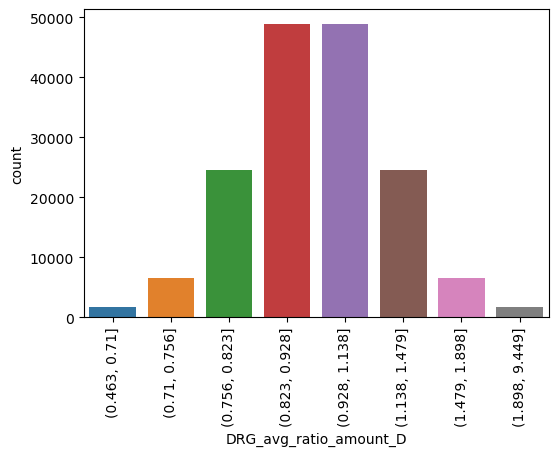

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="DRG_avg_ratio_amount_D", data=df1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [30]:
df1[df1['DRG_avg_ratio_amount']>2].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Avg_Payment_ByDRG,DRG_avg_ratio_amount,DRG_avg_ratio_amount_D
104,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50334,SALINAS VALLEY MEMORIAL HOSPITAL,450 EAST ROMIE LANE,SALINAS,CA,93901,CA - Salinas,17,16744.82,7051.05,6960.53,2.41,"(1.898, 9.449]"
280,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,140008,LOYOLA GOTTLIEB MEMORIAL HOSPITAL,701 WEST NORTH AVE,MELROSE PARK,IL,60160,IL - Melrose Park,16,18420.56,4401.87,6960.53,2.65,"(1.898, 9.449]"
294,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,140080,RHC ST FRANCIS HOSPITAL,355 RIDGE AVE,EVANSTON,IL,60202,IL - Evanston,12,17347.00,6934.08,6960.53,2.49,"(1.898, 9.449]"
456,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,210029,JOHNS HOPKINS BAYVIEW MEDICAL CENTER,4940 EASTERN AVENUE,BALTIMORE,MD,21224,MD - Baltimore,11,16878.45,15855.18,6960.53,2.42,"(1.898, 9.449]"
1172,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50276,CONTRA COSTA REGIONAL MEDICAL CENTER,2500 ALHAMBRA AVE,MARTINEZ,CA,94553,CA - Contra Costa County,23,19239.30,18363.08,6706.28,2.87,"(1.898, 9.449]"


The ratio to average total payments amount provides insights into how a healthcare provider's payment amounts compare to the average for a specific DRG. By establishing specific thresholds, it is possible to identify hospitals that exhibit payment ratios that deviate significantly from the expected norms. When payment ratios are unusually high compared to the average for a given DRG, it can serve as an indicator of potential fraudulent activities.

### Feature 2: The ratio to median total payments amount by DRG

Calculating the ratio to the median total payments amount by DRG allows us to evaluate the central tendency of the data. By comparing the median with the average payment amount, we can identify any potential deviations from the typical payment patterns within a specific DRG. This analysis helps us identify anomalies that differ significantly from the expected payment behavior, even when outliers are present in the data.

In [31]:
stat_by_DRG = data.groupby(['DRG'])['Average_Total_Payments'].median().reset_index()
stat_by_DRG.columns = ['DRG','Median_Payment_ByDRG']
stat_by_DRG

,DRG,Median_Payment_ByDRG
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,6582.89
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,6093.75
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,12084.70
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,7280.05
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,5326.02
...,...,...
95,885 - PSYCHOSES,6155.56
96,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,4529.53
97,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,10062.28
98,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,4136.10


In [32]:
df2 = pd.merge(data, stat_by_DRG, how='left', on=['DRG'])
df2['DRG_median_ratio_amount'] = np.where(df2['Median_Payment_ByDRG']==0,0, df2['Average_Total_Payments'] / df2['Median_Payment_ByDRG'])
df2['DRG_median_ratio_amount'].describe()

count   163065.00
mean         1.08
std          0.27
min          0.50
25%          0.90
50%          1.00
75%          1.17
max         10.22
Name: DRG_median_ratio_amount, dtype: float64

In [33]:
# cut by percentile for plotting
var = 'DRG_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df2[binned_var] = pd.qcut(df2[var],percentile)
df2[['DRG_median_ratio_amount_D']]

,DRG_median_ratio_amount_D
0,"(0.815, 0.886]"
1,"(0.815, 0.886]"
2,"(0.815, 0.886]"
3,"(0.815, 0.886]"
4,"(0.815, 0.886]"
...,...
163060,"(0.815, 0.886]"
163061,"(0.886, 1.0]"
163062,"(1.225, 1.595]"
163063,"(1.595, 2.049]"


<Figure size 600x400 with 0 Axes>

[Text(0, 0, '(0.501, 0.768]'),
 Text(1, 0, '(0.768, 0.815]'),
 Text(2, 0, '(0.815, 0.886]'),
 Text(3, 0, '(0.886, 1.0]'),
 Text(4, 0, '(1.0, 1.225]'),
 Text(5, 0, '(1.225, 1.595]'),
 Text(6, 0, '(1.595, 2.049]'),
 Text(7, 0, '(2.049, 10.221]')]

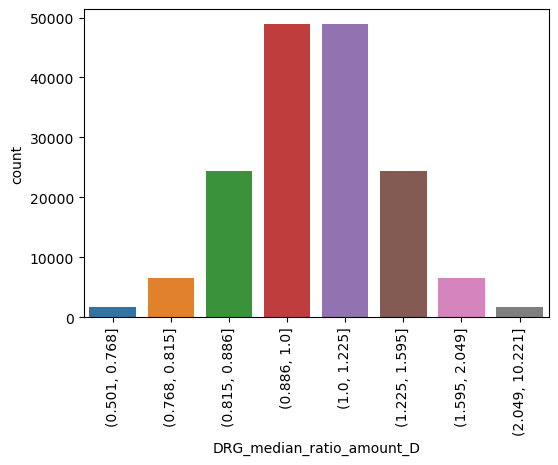

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="DRG_median_ratio_amount_D", data=df2)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [35]:
df2[df2['DRG_median_ratio_amount']>2].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Median_Payment_ByDRG,DRG_median_ratio_amount,DRG_median_ratio_amount_D
104,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50334,SALINAS VALLEY MEMORIAL HOSPITAL,450 EAST ROMIE LANE,SALINAS,CA,93901,CA - Salinas,17,16744.82,7051.05,6582.89,2.54,"(2.049, 10.221]"
280,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,140008,LOYOLA GOTTLIEB MEMORIAL HOSPITAL,701 WEST NORTH AVE,MELROSE PARK,IL,60160,IL - Melrose Park,16,18420.56,4401.87,6582.89,2.80,"(2.049, 10.221]"
294,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,140080,RHC ST FRANCIS HOSPITAL,355 RIDGE AVE,EVANSTON,IL,60202,IL - Evanston,12,17347.00,6934.08,6582.89,2.64,"(2.049, 10.221]"
456,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,210029,JOHNS HOPKINS BAYVIEW MEDICAL CENTER,4940 EASTERN AVENUE,BALTIMORE,MD,21224,MD - Baltimore,11,16878.45,15855.18,6582.89,2.56,"(2.049, 10.221]"
537,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,240063,ST JOSEPH'S HOSPITAL,45 WEST 10TH STREET,SAINT PAUL,MN,55102,MN - St. Paul,14,13234.35,4930.28,6582.89,2.01,"(1.595, 2.049]"


The ratio to median total payments amount provides insights into how a healthcare provider's payment amounts compare to the median for a specific DRG. By establishing specific thresholds, it is possible to identify hospitals that exhibit payment ratios that deviate significantly from the expected norms. When payment ratios are unusually high compared to the median for a given DRG, it can serve as an indicator of potential fraudulent activities.

### Feature 3: The ratio to average medicare payments amount by DRG

The medicare amount for a specific DRG is expected to be relatively consistent. However, certain hospitals may abuse resources, resulting in variations in the medicare payment patterns. By utilizing the ratio calculation, we can evaluate whether a hospital's medicare payment amount for a particular DRG significantly deviates from the average payment amount for that DRG. This analysis allows us to identify hospitals that may be overcharging for services related to a specific DRG.

In [36]:
stat_by_DRG = data.groupby(['DRG'])['Average_Medicare_Payment'].mean().reset_index()
stat_by_DRG.columns = ['DRG','Avg_Payment_ByDRG']
stat_by_DRG

,DRG,Avg_Payment_ByDRG
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,5555.84
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,5701.68
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,12112.85
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,6781.50
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,4469.20
...,...,...
95,885 - PSYCHOSES,5864.13
96,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,3999.92
97,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,9566.82
98,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,3530.39


In [37]:
df3 = pd.merge(data, stat_by_DRG, how='left', on=['DRG'])
df3['DRG_avg_ratio_amount'] = np.where(df3['Avg_Payment_ByDRG']==0,0, df3['Average_Medicare_Payment'] / df1['Avg_Payment_ByDRG'])
df3['DRG_avg_ratio_amount'].describe()

count   163065.00
mean         0.85
std          0.24
min          0.26
25%          0.69
50%          0.78
75%          0.93
max          6.19
Name: DRG_avg_ratio_amount, dtype: float64

In [38]:
# cut by percentile for plotting
var = 'DRG_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df3[binned_var] = pd.qcut(df3[var],percentile)
df3[['DRG_avg_ratio_amount_D']]

,DRG_avg_ratio_amount_D
0,"(0.674, 0.784]"
1,"(0.674, 0.784]"
2,"(0.591, 0.674]"
3,"(0.591, 0.674]"
4,"(0.674, 0.784]"
...,...
163060,"(0.591, 0.674]"
163061,"(0.528, 0.591]"
163062,"(0.784, 0.987]"
163063,"(1.327, 1.738]"


<Figure size 600x400 with 0 Axes>

[Text(0, 0, '(0.261, 0.528]'),
 Text(1, 0, '(0.528, 0.591]'),
 Text(2, 0, '(0.591, 0.674]'),
 Text(3, 0, '(0.674, 0.784]'),
 Text(4, 0, '(0.784, 0.987]'),
 Text(5, 0, '(0.987, 1.327]'),
 Text(6, 0, '(1.327, 1.738]'),
 Text(7, 0, '(1.738, 6.194]')]

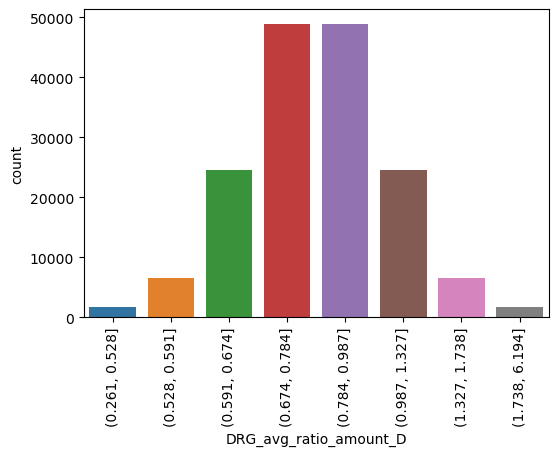

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="DRG_avg_ratio_amount_D", data=df3)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [40]:
df3[df3['DRG_avg_ratio_amount']>2].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Avg_Payment_ByDRG,DRG_avg_ratio_amount,DRG_avg_ratio_amount_D
456,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,210029,JOHNS HOPKINS BAYVIEW MEDICAL CENTER,4940 EASTERN AVENUE,BALTIMORE,MD,21224,MD - Baltimore,11,16878.45,15855.18,5555.84,2.28,"(1.738, 6.194]"
1172,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50276,CONTRA COSTA REGIONAL MEDICAL CENTER,2500 ALHAMBRA AVE,MARTINEZ,CA,94553,CA - Contra Costa County,23,19239.30,18363.08,5701.68,2.74,"(1.738, 6.194]"
1186,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50376,LAC/HARBOR-UCLA MED CENTER,1000 W CARSON ST,TORRANCE,CA,90509,CA - Los Angeles,13,15070.23,14381.00,5701.68,2.14,"(1.738, 6.194]"
1191,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,16,25519.43,22553.56,5701.68,3.36,"(1.738, 6.194]"
1547,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,210002,UNIVERSITY OF MARYLAND MEDICAL CENTER,22 S GREENE ST,BALTIMORE,MD,21201,MD - Baltimore,55,17210.74,15860.05,5701.68,2.36,"(1.738, 6.194]"


The ratio to average medicare payments amount provides insights into how a healthcare provider's medicare payment amounts compare to the average for a specific DRG. By establishing specific thresholds, it is possible to identify hospitals that exhibit payment ratios that deviate significantly from the expected norms. When payment ratios are unusually high compared to the average for a given DRG, it can serve as an indicator of potential fraudulent activities.

### Feature 4: The ratio to median medicare payments amount by DRG

Calculating the ratio to the median medicare payments amount by DRG allows us to evaluate the central tendency of the data. By comparing the median with the average medicare payment amount, we can identify any potential deviations from the typical payment patterns within a specific DRG. This analysis helps us identify anomalies that differ significantly from the expected medicare payment behavior, even when outliers are present in the data.

In [41]:
stat_by_DRG = data.groupby(['DRG'])['Average_Medicare_Payment'].median().reset_index()
stat_by_DRG.columns = ['DRG','Median_Payment_ByDRG']
stat_by_DRG

,DRG,Median_Payment_ByDRG
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,5269.28
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,5104.78
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,10956.16
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,6167.51
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,4079.57
...,...,...
95,885 - PSYCHOSES,5126.81
96,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,3550.09
97,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,8868.75
98,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,3203.03


In [42]:
df4 = pd.merge(data, stat_by_DRG, how='left', on=['DRG'])
df4['DRG_median_ratio_amount'] = np.where(df4['Median_Payment_ByDRG']==0,0, df4['Average_Medicare_Payment'] / df4['Median_Payment_ByDRG'])
df4['DRG_median_ratio_amount'].describe()

count   163065.00
mean         1.09
std          0.31
min          0.39
25%          0.90
50%          1.00
75%          1.19
max          8.42
Name: DRG_median_ratio_amount, dtype: float64

In [43]:
# cut by percentile for plotting
var = 'DRG_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df4[binned_var] = pd.qcut(df4[var],percentile)
df4[['DRG_median_ratio_amount_D']]

,DRG_median_ratio_amount_D
0,"(0.875, 1.0]"
1,"(0.875, 1.0]"
2,"(0.791, 0.875]"
3,"(0.726, 0.791]"
4,"(0.875, 1.0]"
...,...
163060,"(0.791, 0.875]"
163061,"(0.726, 0.791]"
163062,"(1.0, 1.259]"
163063,"(1.7, 2.244]"


<Figure size 600x400 with 0 Axes>

[Text(0, 0, '(0.385, 0.726]'),
 Text(1, 0, '(0.726, 0.791]'),
 Text(2, 0, '(0.791, 0.875]'),
 Text(3, 0, '(0.875, 1.0]'),
 Text(4, 0, '(1.0, 1.259]'),
 Text(5, 0, '(1.259, 1.7]'),
 Text(6, 0, '(1.7, 2.244]'),
 Text(7, 0, '(2.244, 8.421]')]

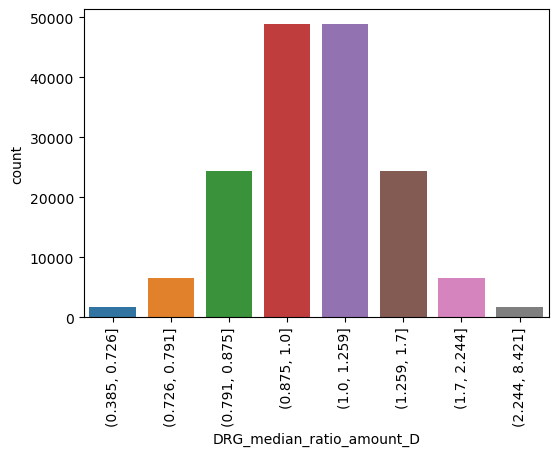

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="DRG_median_ratio_amount_D", data=df4)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [45]:
df4[df4['DRG_median_ratio_amount']>2].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Median_Payment_ByDRG,DRG_median_ratio_amount,DRG_median_ratio_amount_D
97,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50262,RONALD REAGAN UCLA MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,13,11899.76,10946.84,5269.28,2.08,"(1.7, 2.244]"
114,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,27,12396.29,11483.40,5269.28,2.18,"(1.7, 2.244]"
449,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,MD - Baltimore,36,12856.22,11891.22,5269.28,2.26,"(2.244, 8.421]"
456,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,210029,JOHNS HOPKINS BAYVIEW MEDICAL CENTER,4940 EASTERN AVENUE,BALTIMORE,MD,21224,MD - Baltimore,11,16878.45,15855.18,5269.28,3.01,"(2.244, 8.421]"
457,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,210032,UNION HOSPITAL OF CECIL COUNTY,106 BOW STREET,ELKTON,MD,21921,DE - Wilmington,12,12268.50,11335.83,5269.28,2.15,"(1.7, 2.244]"


The ratio to median medicare payments amount provides insights into how a healthcare provider's payment amounts compare to the median for a specific DRG. By establishing specific thresholds, it is possible to identify hospitals that exhibit payment ratios that deviate significantly from the expected norms. When payment ratios are unusually high compared to the median for a given DRG, it can serve as an indicator of potential fraudulent activities.

### Feature 5: The ratio to average total discharges by DRG

The total discharges for a specific DRG is expected to be relatively consistent. However, certain hospitals may abuse resources, resulting in variations in the total discharges patterns. By utilizing the ratio calculation, we can evaluate whether a hospital's total discharges for a particular DRG significantly deviates from the average total discharges for that DRG. This analysis allows us to identify hospitals that may be abusing resources for services related to a specific DRG.

In [49]:
stat_by_DRG = data.groupby(['DRG'])['Total_Discharges'].mean().reset_index()
stat_by_DRG.columns = ['DRG','Avg_Discharges_ByDRG']
stat_by_DRG

,DRG,Avg_Discharges_ByDRG
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,31.15
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,25.16
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,37.43
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,46.90
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,30.92
...,...,...
95,885 - PSYCHOSES,146.38
96,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,35.25
97,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,20.11
98,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,21.15


In [50]:
df5 = pd.merge(data, stat_by_DRG, how='left', on=['DRG'])
df5['DRG_avg_ratio_discharges'] = np.where(df5['Avg_Discharges_ByDRG']==0,0, df5['Total_Discharges'] / df5['Avg_Discharges_ByDRG'])
df5['DRG_avg_ratio_discharges'].describe()

count   163065.00
mean         1.00
std          0.76
min          0.07
25%          0.52
50%          0.79
75%          1.24
max         44.57
Name: DRG_avg_ratio_discharges, dtype: float64

In [53]:
# cut by percentile for plotting
var = 'DRG_avg_ratio_discharges'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df5[binned_var] = pd.qcut(df5[var],percentile)
df5[['DRG_avg_ratio_discharges_D']]

,DRG_avg_ratio_discharges_D
0,"(2.4, 3.791]"
1,"(0.29, 0.476]"
2,"(0.476, 0.789]"
3,"(0.789, 1.388]"
4,"(0.476, 0.789]"
...,...
163060,"(0.789, 1.388]"
163061,"(0.29, 0.476]"
163062,"(0.476, 0.789]"
163063,"(0.29, 0.476]"


<Figure size 600x400 with 0 Axes>

[Text(0, 0, '(0.0698, 0.183]'),
 Text(1, 0, '(0.183, 0.29]'),
 Text(2, 0, '(0.29, 0.476]'),
 Text(3, 0, '(0.476, 0.789]'),
 Text(4, 0, '(0.789, 1.388]'),
 Text(5, 0, '(1.388, 2.4]'),
 Text(6, 0, '(2.4, 3.791]'),
 Text(7, 0, '(3.791, 44.569]')]

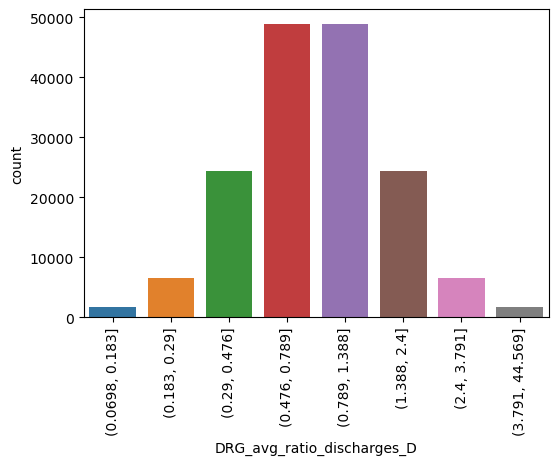

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="DRG_avg_ratio_discharges_D", data=df5)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [55]:
df5[df5['DRG_avg_ratio_discharges']>2].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Avg_Discharges_ByDRG,DRG_avg_ratio_discharges,DRG_avg_ratio_discharges_D
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,4763.73,31.15,2.92,"(2.4, 3.791]"
5,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,67,6653.80,5374.14,31.15,2.15,"(1.388, 2.4]"
8,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10039,HUNTSVILLE HOSPITAL,101 SIVLEY RD,HUNTSVILLE,AL,35801,AL - Huntsville,135,6113.38,5228.40,31.15,4.33,"(3.791, 44.569]"
21,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10113,MOBILE INFIRMARY,5 MOBILE INFIRMARY CIRCLE,MOBILE,AL,36652,AL - Mobile,66,5550.90,4219.90,31.15,2.12,"(1.388, 2.4]"
47,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,30105,BANNER HEART HOSPITAL,6750 EAST BAYWOOD AVENUE,MESA,AZ,85206,AZ - Mesa,64,6291.95,4788.12,31.15,2.05,"(1.388, 2.4]"


The ratio to average total discharges provides insights into how a healthcare provider's total discharges compare to the average for a specific DRG. By establishing specific thresholds, it is possible to identify hospitals that exhibit total discharges that deviate significantly from the expected norms. When total discharges are unusually high compared to the average for a given DRG, it can serve as an indicator of potential fraudulent activities.

### Feature 6: The ratio to median total discharges by DRG


Calculating the ratio to the median total discharges by DRG allows us to evaluate the central tendency of the data. By comparing the median with the average total discharges, we can identify any potential deviations from the typical discharge patterns within a specific DRG. This analysis helps us identify anomalies that differ significantly from the expected total discharge behavior, even when outliers are present in the data.

In [57]:
stat_by_DRG = data.groupby(['DRG'])['Total_Discharges'].median().reset_index()
stat_by_DRG.columns = ['DRG','Median_Discharges_ByDRG']
stat_by_DRG


,DRG,Median_Discharges_ByDRG
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,23.00
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,20.00
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,28.00
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,35.00
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,25.00
...,...,...
95,885 - PSYCHOSES,81.00
96,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,21.00
97,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,17.00
98,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,18.00


In [58]:
df6 = pd.merge(data, stat_by_DRG, how='left', on=['DRG'])
df6['DRG_median_ratio_discharges'] = np.where(df6['Median_Discharges_ByDRG']==0,0, df6['Total_Discharges'] / df6['Median_Discharges_ByDRG'])
df6['DRG_median_ratio_discharges'].describe()

count   163065.00
mean         1.29
std          1.02
min          0.11
25%          0.67
50%          1.00
75%          1.58
max         74.81
Name: DRG_median_ratio_discharges, dtype: float64

In [59]:
# cut by percentile for plotting
var = 'DRG_median_ratio_discharges'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df6[binned_var] = pd.qcut(df6[var],percentile)
df6[['DRG_median_ratio_discharges_D']]

,DRG_median_ratio_discharges_D
0,"(3.122, 5.037]"
1,"(0.385, 0.611]"
2,"(1.0, 1.778]"
3,"(1.0, 1.778]"
4,"(0.611, 1.0]"
...,...
163060,"(1.0, 1.778]"
163061,"(0.385, 0.611]"
163062,"(0.611, 1.0]"
163063,"(0.385, 0.611]"


<Figure size 600x400 with 0 Axes>

[Text(0, 0, '(0.105, 0.255]'),
 Text(1, 0, '(0.255, 0.385]'),
 Text(2, 0, '(0.385, 0.611]'),
 Text(3, 0, '(0.611, 1.0]'),
 Text(4, 0, '(1.0, 1.778]'),
 Text(5, 0, '(1.778, 3.122]'),
 Text(6, 0, '(3.122, 5.037]'),
 Text(7, 0, '(5.037, 74.81]')]

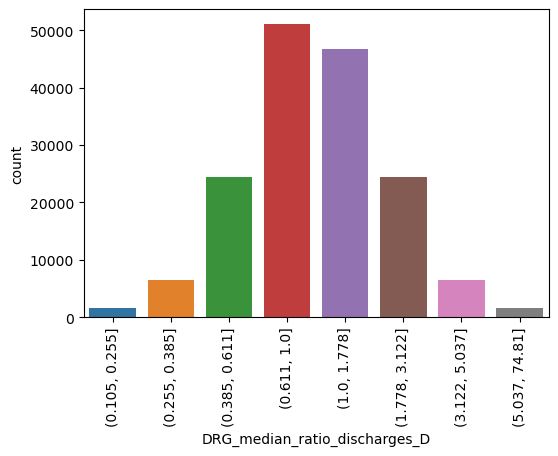

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="DRG_median_ratio_discharges_D", data=df6)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [61]:
df6[df6['DRG_median_ratio_discharges']>2].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Median_Discharges_ByDRG,DRG_median_ratio_discharges,DRG_median_ratio_discharges_D
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,4763.73,23.00,3.96,"(3.122, 5.037]"
5,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,67,6653.80,5374.14,23.00,2.91,"(1.778, 3.122]"
6,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,51,5834.74,4761.41,23.00,2.22,"(1.778, 3.122]"
8,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10039,HUNTSVILLE HOSPITAL,101 SIVLEY RD,HUNTSVILLE,AL,35801,AL - Huntsville,135,6113.38,5228.40,23.00,5.87,"(5.037, 74.81]"
21,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10113,MOBILE INFIRMARY,5 MOBILE INFIRMARY CIRCLE,MOBILE,AL,36652,AL - Mobile,66,5550.90,4219.90,23.00,2.87,"(1.778, 3.122]"


The ratio to median total discharges provides insights into how a healthcare provider's total discharges compare to the median for a specific DRG. By establishing specific thresholds, it is possible to identify hospitals that exhibit total discharge ratios that deviate significantly from the expected norms. When total discharge ratio ratios are unusually high compared to the median for a given DRG, it can serve as an indicator of potential fraudulent activities.

### Feature 7: The ratio to average total payments amount by State & DRG

Hospitals operating within the same state are expected to demonstrate comparable average total payments for a given DRG. However, it is possible for one or two hospitals to abuse resources, leading to variations in their payment patterns. By calculating this ratio, we can assess whether a particular hospital's payment amount for a specific DRG is significantly higher or lower than the average payment for that DRG within the state.

In [62]:
stat_by_StateDRG = data.groupby(['Provider_State','DRG'])['Average_Total_Payments'].mean().reset_index()
stat_by_StateDRG.columns = ['Provider_State','DRG','Avg_Payment_ByStateDRG']
stat_by_StateDRG

,Provider_State,DRG,Avg_Payment_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,8401.95
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8799.00
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21608.01
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,12555.55
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,9275.87
...,...,...,...
5095,WY,885 - PSYCHOSES,NaN
5096,WY,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,5592.21
5097,WY,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,14977.91
5098,WY,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,5574.38


In [63]:
df7 = pd.merge(data, stat_by_StateDRG, how='left', on=['Provider_State', 'DRG'])
df7['StateDRG_avg_ratio_amount'] = np.where(df7['Avg_Payment_ByStateDRG']==0,0, df7['Average_Total_Payments'] / df7['Avg_Payment_ByStateDRG'])
df7['StateDRG_avg_ratio_amount'].describe()

count   163065.00
mean         1.00
std          0.20
min          0.38
25%          0.88
50%          0.96
75%          1.06
max          7.86
Name: StateDRG_avg_ratio_amount, dtype: float64

In [64]:
# cut by percentile for plotting
var = 'StateDRG_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df7[binned_var] = pd.qcut(df7[var],percentile)
df7[['StateDRG_avg_ratio_amount_D']]

,StateDRG_avg_ratio_amount_D
0,"(0.957, 1.102]"
1,"(0.957, 1.102]"
2,"(0.864, 0.957]"
3,"(0.864, 0.957]"
4,"(0.957, 1.102]"
...,...
163060,"(0.785, 0.864]"
163061,"(0.864, 0.957]"
163062,"(1.102, 1.383]"
163063,"(1.383, 1.663]"


<Figure size 600x400 with 0 Axes>

[Text(0, 0, '(0.384, 0.694]'),
 Text(1, 0, '(0.694, 0.785]'),
 Text(2, 0, '(0.785, 0.864]'),
 Text(3, 0, '(0.864, 0.957]'),
 Text(4, 0, '(0.957, 1.102]'),
 Text(5, 0, '(1.102, 1.383]'),
 Text(6, 0, '(1.383, 1.663]'),
 Text(7, 0, '(1.663, 7.858]')]

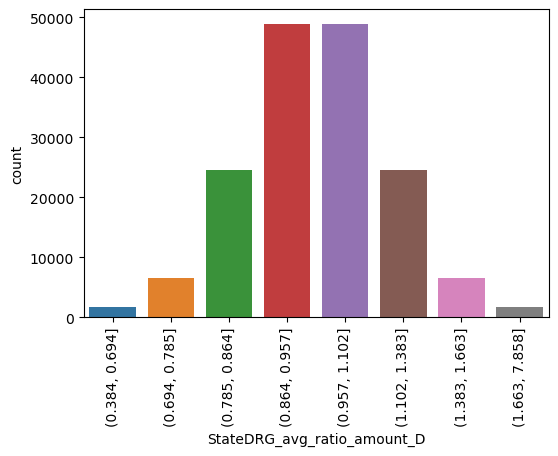

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="StateDRG_avg_ratio_amount_D", data=df7)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [66]:
df7[df7['StateDRG_avg_ratio_amount']>2].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Avg_Payment_ByStateDRG,StateDRG_avg_ratio_amount,StateDRG_avg_ratio_amount_D
280,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,140008,LOYOLA GOTTLIEB MEMORIAL HOSPITAL,701 WEST NORTH AVE,MELROSE PARK,IL,60160,IL - Melrose Park,16,18420.56,4401.87,7376.79,2.50,"(1.663, 7.858]"
294,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,140080,RHC ST FRANCIS HOSPITAL,355 RIDGE AVE,EVANSTON,IL,60202,IL - Evanston,12,17347.00,6934.08,7376.79,2.35,"(1.663, 7.858]"
1172,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50276,CONTRA COSTA REGIONAL MEDICAL CENTER,2500 ALHAMBRA AVE,MARTINEZ,CA,94553,CA - Contra Costa County,23,19239.30,18363.08,8528.76,2.26,"(1.663, 7.858]"
1191,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,16,25519.43,22553.56,8528.76,2.99,"(1.663, 7.858]"
1258,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,100022,JACKSON MEMORIAL HOSPITAL,1611 NW 12TH AVE,MIAMI,FL,33136,FL - Miami,29,12789.27,11467.62,5715.70,2.24,"(1.663, 7.858]"


By establishing specific thresholds, it is possible to identify hospitals that exhibit payment ratios that deviate significantly from the expected norms. When payment ratios are unusually high compared to the average for a given DRG and within a given state, it can serve as an indicator of potential fraudulent activities.

### Feature 8: The ratio to median total payments amount by State & DRG

Hospitals operating within the same state are expected to demonstrate comparable median total payments for a given DRG. However, it is possible for one or two hospitals to abuse resources, leading to variations in their payment patterns. By calculating this ratio, we can assess whether a particular hospital's payment amount for a specific DRG is significantly higher or lower than the median payment for that DRG within the state.

In [68]:
stat_by_StateDRG = data.groupby(['Provider_State','DRG'])['Average_Total_Payments'].median().reset_index()
stat_by_StateDRG.columns = ['Provider_State','DRG','Median_Payment_ByStateDRG']
stat_by_StateDRG

,Provider_State,DRG,Median_Payment_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,8401.95
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8799.00
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21608.01
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,12437.05
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,9320.25
...,...,...,...
5095,WY,885 - PSYCHOSES,NaN
5096,WY,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,5592.21
5097,WY,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,14977.91
5098,WY,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,5574.38


In [69]:
df8 = pd.merge(data, stat_by_StateDRG, how='left', on=['Provider_State', 'DRG'])
df8['StateDRG_median_ratio_amount'] = np.where(df8['Median_Payment_ByStateDRG']==0,0, df8['Average_Total_Payments'] / df8['Median_Payment_ByStateDRG'])
df8['StateDRG_median_ratio_amount'].describe()

count   163065.00
mean         1.05
std          0.21
min          0.52
25%          0.93
50%          1.00
75%          1.11
max          9.34
Name: StateDRG_median_ratio_amount, dtype: float64

In [70]:
# cut by percentile for plotting
var = 'StateDRG_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df8[binned_var] = pd.qcut(df8[var],percentile)
df8[['StateDRG_median_ratio_amount_D']]

,StateDRG_median_ratio_amount_D
0,"(1.0, 1.153]"
1,"(1.0, 1.153]"
2,"(0.908, 1.0]"
3,"(0.908, 1.0]"
4,"(0.908, 1.0]"
...,...
163060,"(0.83, 0.908]"
163061,"(0.908, 1.0]"
163062,"(1.153, 1.466]"
163063,"(1.466, 1.79]"


<Figure size 600x400 with 0 Axes>

[Text(0, 0, '(0.517, 0.75]'),
 Text(1, 0, '(0.75, 0.83]'),
 Text(2, 0, '(0.83, 0.908]'),
 Text(3, 0, '(0.908, 1.0]'),
 Text(4, 0, '(1.0, 1.153]'),
 Text(5, 0, '(1.153, 1.466]'),
 Text(6, 0, '(1.466, 1.79]'),
 Text(7, 0, '(1.79, 9.339]')]

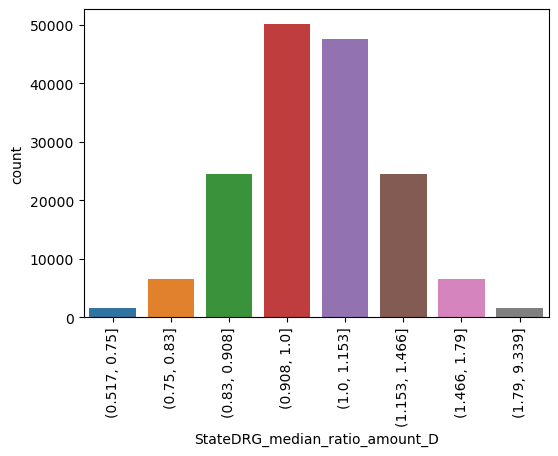

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="StateDRG_median_ratio_amount_D", data=df8)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [72]:
df8[df8['StateDRG_median_ratio_amount']>2].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Median_Payment_ByStateDRG,StateDRG_median_ratio_amount,StateDRG_median_ratio_amount_D
104,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50334,SALINAS VALLEY MEMORIAL HOSPITAL,450 EAST ROMIE LANE,SALINAS,CA,93901,CA - Salinas,17,16744.82,7051.05,7863.14,2.13,"(1.79, 9.339]"
280,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,140008,LOYOLA GOTTLIEB MEMORIAL HOSPITAL,701 WEST NORTH AVE,MELROSE PARK,IL,60160,IL - Melrose Park,16,18420.56,4401.87,6673.57,2.76,"(1.79, 9.339]"
294,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,140080,RHC ST FRANCIS HOSPITAL,355 RIDGE AVE,EVANSTON,IL,60202,IL - Evanston,12,17347.00,6934.08,6673.57,2.60,"(1.79, 9.339]"
1172,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50276,CONTRA COSTA REGIONAL MEDICAL CENTER,2500 ALHAMBRA AVE,MARTINEZ,CA,94553,CA - Contra Costa County,23,19239.30,18363.08,7689.05,2.50,"(1.79, 9.339]"
1191,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,16,25519.43,22553.56,7689.05,3.32,"(1.79, 9.339]"


By establishing specific thresholds, it is possible to identify hospitals that exhibit payment ratios that deviate significantly from the expected norms. When payment ratios are unusually high compared to the median for a given DRG and within a given state, it can serve as an indicator of potential fraudulent activities.

### Feature 9: The ratio to average medicare payments amount by State & DRG

Hospitals operating within the same state are expected to demonstrate comparable average medicare payments for a given DRG. However, it is possible for one or two hospitals to abuse resources, leading to variations in their payment patterns. By calculating this ratio, we can assess whether a particular hospital's medicare payment amount for a specific DRG is significantly higher or lower than the average payment for that DRG within the state.

In [73]:
stat_by_StateDRG = data.groupby(['Provider_State','DRG'])['Average_Medicare_Payment'].mean().reset_index()
stat_by_StateDRG.columns = ['Provider_State','DRG','Avg_Payment_ByStateDRG']
stat_by_StateDRG

,Provider_State,DRG,Avg_Payment_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,6413.78
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8081.54
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,20555.26
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,11140.96
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,8258.43
...,...,...,...
5095,WY,885 - PSYCHOSES,NaN
5096,WY,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,4705.00
5097,WY,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,7168.25
5098,WY,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,3954.39


In [74]:
df9 = pd.merge(data, stat_by_StateDRG, how='left', on=['Provider_State', 'DRG'])
df9['StateDRG_avg_ratio_amount'] = np.where(df9['Avg_Payment_ByStateDRG']==0,0, df9['Average_Medicare_Payment'] / df9['Avg_Payment_ByStateDRG'])
df9['StateDRG_avg_ratio_amount'].describe()

count   163065.00
mean         1.00
std          0.22
min          0.34
25%          0.87
50%          0.95
75%          1.07
max          5.17
Name: StateDRG_avg_ratio_amount, dtype: float64

In [75]:
# cut by percentile for plotting
var = 'StateDRG_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df9[binned_var] = pd.qcut(df9[var],percentile)
df9[['StateDRG_avg_ratio_amount_D']]

,StateDRG_avg_ratio_amount_D
0,"(0.954, 1.111]"
1,"(0.954, 1.111]"
2,"(0.954, 1.111]"
3,"(0.849, 0.954]"
4,"(0.954, 1.111]"
...,...
163060,"(0.757, 0.849]"
163061,"(0.655, 0.757]"
163062,"(0.954, 1.111]"
163063,"(1.744, 5.174]"


<Figure size 600x400 with 0 Axes>

[Text(0, 0, '(0.339, 0.655]'),
 Text(1, 0, '(0.655, 0.757]'),
 Text(2, 0, '(0.757, 0.849]'),
 Text(3, 0, '(0.849, 0.954]'),
 Text(4, 0, '(0.954, 1.111]'),
 Text(5, 0, '(1.111, 1.43]'),
 Text(6, 0, '(1.43, 1.744]'),
 Text(7, 0, '(1.744, 5.174]')]

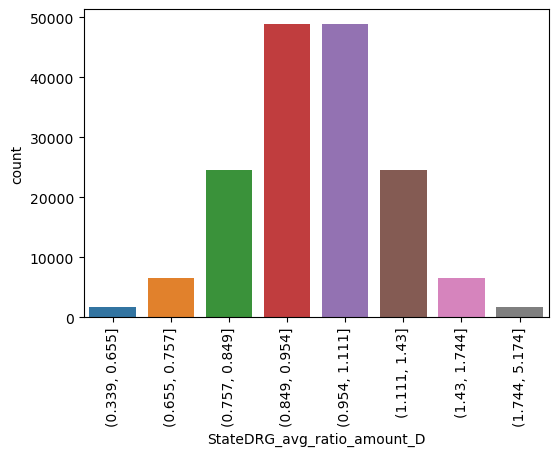

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="StateDRG_avg_ratio_amount_D", data=df9)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [77]:
df9[df9['StateDRG_avg_ratio_amount']>2].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Avg_Payment_ByStateDRG,StateDRG_avg_ratio_amount,StateDRG_avg_ratio_amount_D
1172,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50276,CONTRA COSTA REGIONAL MEDICAL CENTER,2500 ALHAMBRA AVE,MARTINEZ,CA,94553,CA - Contra Costa County,23,19239.30,18363.08,7506.49,2.45,"(1.744, 5.174]"
1191,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,16,25519.43,22553.56,7506.49,3.00,"(1.744, 5.174]"
1258,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,100022,JACKSON MEMORIAL HOSPITAL,1611 NW 12TH AVE,MIAMI,FL,33136,FL - Miami,29,12789.27,11467.62,4759.26,2.41,"(1.744, 5.174]"
1417,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,140150,UNIVERSITY OF ILLINOIS HOSPITAL,1740 WEST TAYLOR ST SUITE 1400,CHICAGO,IL,60612,IL - Chicago,16,12215.06,11442.81,5428.79,2.11,"(1.744, 5.174]"
1554,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,MD - Baltimore,83,24865.61,22873.49,8352.41,2.74,"(1.744, 5.174]"


By establishing specific thresholds, it is possible to identify hospitals that exhibit medicare payment ratios that deviate significantly from the expected norms. When payment ratios are unusually high compared to the average for a given DRG and within a given state, it can serve as an indicator of potential fraudulent activities.

### Feature 10: The ratio to median medical payments by State & DRG

Hospitals operating within the same state are expected to demonstrate comparable median medicare payments for a given DRG. However, it is possible for one or two hospitals to abuse resources, leading to variations in their payment patterns. By calculating this ratio, we can assess whether a particular hospital's payment amount for a specific DRG is significantly higher or lower than the median payment for that DRG within the state.

In [78]:
stat_by_StateDRG = data.groupby(['Provider_State','DRG'])['Average_Medicare_Payment'].median().reset_index()
stat_by_StateDRG.columns = ['Provider_State','DRG','Median_Payment_ByStateDRG']
stat_by_StateDRG

,Provider_State,DRG,Median_Payment_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,6413.78
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8081.54
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,20555.26
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,10495.34
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,8372.92
...,...,...,...
5095,WY,885 - PSYCHOSES,NaN
5096,WY,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,4705.00
5097,WY,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,7168.25
5098,WY,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,3954.39


In [79]:
df10 = pd.merge(data, stat_by_StateDRG, how='left', on=['Provider_State', 'DRG'])
df10['StateDRG_median_ratio_amount'] = np.where(df10['Median_Payment_ByStateDRG']==0,0, df10['Average_Medicare_Payment'] / df10['Median_Payment_ByStateDRG'])
df10['StateDRG_median_ratio_amount'].describe()

count   163065.00
mean         1.06
std          0.23
min          0.37
25%          0.92
50%          1.00
75%          1.12
max          6.03
Name: StateDRG_median_ratio_amount, dtype: float64

In [80]:
# cut by percentile for plotting
var = 'StateDRG_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df10[binned_var] = pd.qcut(df10[var],percentile)
df10[['StateDRG_median_ratio_amount_D']]

,StateDRG_median_ratio_amount_D
0,"(1.0, 1.167]"
1,"(1.0, 1.167]"
2,"(0.897, 1.0]"
3,"(0.897, 1.0]"
4,"(1.0, 1.167]"
...,...
163060,"(0.805, 0.897]"
163061,"(0.714, 0.805]"
163062,"(1.167, 1.527]"
163063,"(1.898, 6.031]"


<Figure size 600x400 with 0 Axes>

[Text(0, 0, '(0.367, 0.714]'),
 Text(1, 0, '(0.714, 0.805]'),
 Text(2, 0, '(0.805, 0.897]'),
 Text(3, 0, '(0.897, 1.0]'),
 Text(4, 0, '(1.0, 1.167]'),
 Text(5, 0, '(1.167, 1.527]'),
 Text(6, 0, '(1.527, 1.898]'),
 Text(7, 0, '(1.898, 6.031]')]

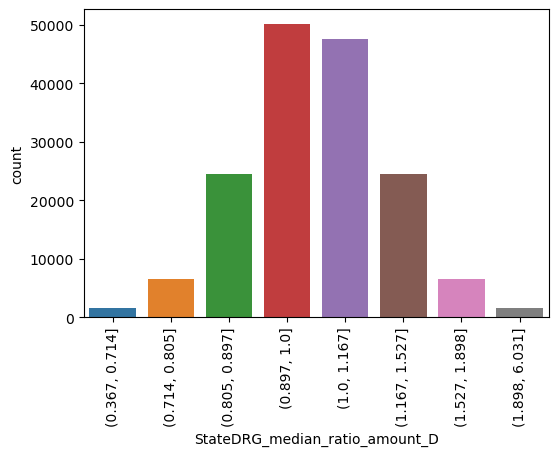

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="StateDRG_median_ratio_amount_D", data=df10)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [82]:
df10[df10['StateDRG_median_ratio_amount']>2].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Median_Payment_ByStateDRG,StateDRG_median_ratio_amount,StateDRG_median_ratio_amount_D
456,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,210029,JOHNS HOPKINS BAYVIEW MEDICAL CENTER,4940 EASTERN AVENUE,BALTIMORE,MD,21224,MD - Baltimore,11,16878.45,15855.18,7340.71,2.16,"(1.898, 6.031]"
690,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,330195,LONG ISLAND JEWISH MEDICAL CENTER,270 - 05 76TH AVENUE,NEW HYDE PARK,NY,11040,NY - East Long Island,11,13895.09,13280.54,6358.07,2.09,"(1.898, 6.031]"
1172,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50276,CONTRA COSTA REGIONAL MEDICAL CENTER,2500 ALHAMBRA AVE,MARTINEZ,CA,94553,CA - Contra Costa County,23,19239.30,18363.08,6800.43,2.70,"(1.898, 6.031]"
1186,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50376,LAC/HARBOR-UCLA MED CENTER,1000 W CARSON ST,TORRANCE,CA,90509,CA - Los Angeles,13,15070.23,14381.00,6800.43,2.11,"(1.898, 6.031]"
1191,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,16,25519.43,22553.56,6800.43,3.32,"(1.898, 6.031]"


By establishing specific thresholds, it is possible to identify hospitals that exhibit medicare payment ratios that deviate significantly from the expected norms. When medicare payment ratios are unusually high compared to the median for a given DRG and within a given state, it can serve as an indicator of potential fraudulent activities.

### Feature 11: The ratio to average total discharges by State & DRG

The total discharges for a specific DRG and a given state is expected to be relatively consistent. However, certain hospitals may abuse resources, resulting in variations in the total discharges patterns. By utilizing the ratio calculation, we can evaluate whether a hospital's total discharges in a same state for a particular DRG significantly deviates from the average total discharges for that DRG. This analysis allows us to identify hospitals that may be abusing resources for services related to a specific DRG.

In [84]:
stat_by_StateDRG = data.groupby(['Provider_State','DRG'])['Total_Discharges'].mean().reset_index()
stat_by_StateDRG.columns = ['Provider_State','DRG','Avg_Discharges_ByStateDRG']
stat_by_StateDRG

,Provider_State,DRG,Avg_Discharges_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,23.00
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,11.00
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,22.50
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,25.33
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21.00
...,...,...,...
5095,WY,885 - PSYCHOSES,NaN
5096,WY,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,14.00
5097,WY,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,12.00
5098,WY,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,15.50


In [85]:
df11 = pd.merge(data, stat_by_StateDRG, how='left', on=['Provider_State', 'DRG'])
df11['StateDRG_avg_ratio_amount'] = np.where(df11['Avg_Discharges_ByStateDRG']==0,0, df11['Total_Discharges'] / df11['Avg_Discharges_ByStateDRG'])
df11['StateDRG_avg_ratio_amount'].describe()

count   163065.00
mean         1.00
std          0.69
min          0.05
25%          0.55
50%          0.82
75%          1.25
max         24.62
Name: StateDRG_avg_ratio_amount, dtype: float64

In [86]:
# cut by percentile for plotting
var = 'StateDRG_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df11[binned_var] = pd.qcut(df11[var],percentile)
df11[['StateDRG_avg_ratio_amount_D']]

,StateDRG_avg_ratio_amount_D
0,"(2.287, 3.472]"
1,"(0.305, 0.5]"
2,"(0.5, 0.82]"
3,"(0.5, 0.82]"
4,"(0.305, 0.5]"
...,...
163060,"(0.82, 1.388]"
163061,"(0.305, 0.5]"
163062,"(0.5, 0.82]"
163063,"(0.305, 0.5]"


<Figure size 600x400 with 0 Axes>

[Text(0, 0, '(0.044, 0.19]'),
 Text(1, 0, '(0.19, 0.305]'),
 Text(2, 0, '(0.305, 0.5]'),
 Text(3, 0, '(0.5, 0.82]'),
 Text(4, 0, '(0.82, 1.388]'),
 Text(5, 0, '(1.388, 2.287]'),
 Text(6, 0, '(2.287, 3.472]'),
 Text(7, 0, '(3.472, 24.625]')]

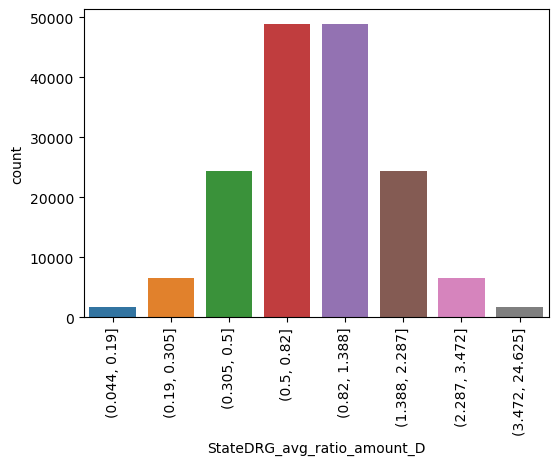

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="StateDRG_avg_ratio_amount_D", data=df11)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [88]:
df11[df11['StateDRG_avg_ratio_amount']>2].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Avg_Discharges_ByStateDRG,StateDRG_avg_ratio_amount,StateDRG_avg_ratio_amount_D
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,4763.73,38.22,2.38,"(2.287, 3.472]"
8,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10039,HUNTSVILLE HOSPITAL,101 SIVLEY RD,HUNTSVILLE,AL,35801,AL - Huntsville,135,6113.38,5228.40,38.22,3.53,"(3.472, 24.625]"
35,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,30061,BANNER BOSWELL MEDICAL CENTER,10401 WEST THUNDERBIRD BOULEVARD,SUN CITY,AZ,85351,AZ - Sun City,62,6048.61,4951.90,25.25,2.46,"(2.287, 3.472]"
47,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,30105,BANNER HEART HOSPITAL,6750 EAST BAYWOOD AVENUE,MESA,AZ,85206,AZ - Mesa,64,6291.95,4788.12,25.25,2.53,"(2.287, 3.472]"
60,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,40114,BAPTIST HEALTH MEDICAL CENTER-LITTLE ROCK,"9601 INTERSTATE 630, EXIT 7",LITTLE ROCK,AR,72205,AR - Little Rock,139,5968.44,4592.46,40.75,3.41,"(2.287, 3.472]"


By establishing specific thresholds, it is possible to identify hospitals that exhibit total discharges ratios that deviate significantly from the expected norms. When total discharges ratios are unusually high compared to the average for a given DRG and within a given state, it can serve as an indicator of potential fraudulent activities.

### Feature 12: The ratio to median total discharges by State & DRG

Calculating the ratio to the median total discharges by DRG and stateallows us to evaluate the central tendency of the data. By comparing the median with the average total discharges, we can identify any potential deviations from the typical discharge patterns within a specific DRG and a given state. This analysis helps us identify anomalies that differ significantly from the expected total discharge behavior, even when outliers are present in the data.

In [90]:
stat_by_StateDRG = data.groupby(['Provider_State','DRG'])['Total_Discharges'].median().reset_index()
stat_by_StateDRG.columns = ['Provider_State','DRG','Median_Discharges_ByStateDRG']
stat_by_StateDRG

,Provider_State,DRG,Median_Discharges_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,23.00
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,11.00
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,22.50
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,17.50
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,18.00
...,...,...,...
5095,WY,885 - PSYCHOSES,NaN
5096,WY,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,14.00
5097,WY,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,12.00
5098,WY,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,15.50


In [91]:
df12 = pd.merge(data, stat_by_StateDRG, how='left', on=['Provider_State', 'DRG'])
df12['StateDRG_median_ratio_amount'] = np.where(df12['Median_Discharges_ByStateDRG']==0,0, df12['Total_Discharges'] / df12['Median_Discharges_ByStateDRG'])
df12['StateDRG_median_ratio_amount'].describe()

count   163065.00
mean         1.26
std          0.99
min          0.05
25%          0.69
50%          1.00
75%          1.53
max         71.41
Name: StateDRG_median_ratio_amount, dtype: float64

In [93]:
# cut by percentile for plotting
var = 'StateDRG_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df12[binned_var] = pd.qcut(df12[var],percentile)
df12[['StateDRG_median_ratio_amount_D']]

,StateDRG_median_ratio_amount_D
0,"(2.967, 4.816]"
1,"(0.394, 0.629]"
2,"(0.629, 1.0]"
3,"(0.629, 1.0]"
4,"(0.394, 0.629]"
...,...
163060,"(1.0, 1.708]"
163061,"(0.394, 0.629]"
163062,"(0.629, 1.0]"
163063,"(0.394, 0.629]"


<Figure size 600x400 with 0 Axes>

[Text(0, 0, '(0.0462, 0.25]'),
 Text(1, 0, '(0.25, 0.394]'),
 Text(2, 0, '(0.394, 0.629]'),
 Text(3, 0, '(0.629, 1.0]'),
 Text(4, 0, '(1.0, 1.708]'),
 Text(5, 0, '(1.708, 2.967]'),
 Text(6, 0, '(2.967, 4.816]'),
 Text(7, 0, '(4.816, 71.409]')]

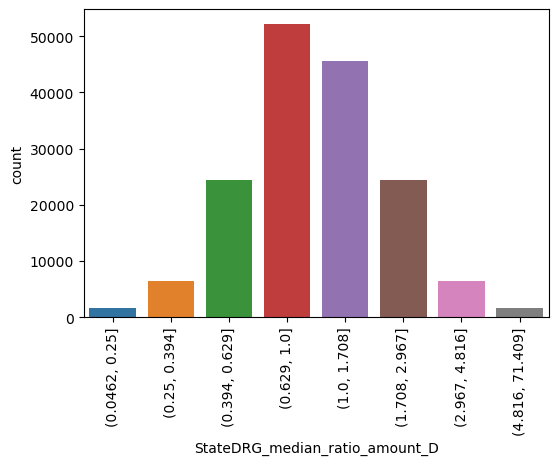

In [94]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="StateDRG_median_ratio_amount_D", data=df12)
g.set_xticklabels(g.get_xticklabels(), rotation=90)


In [95]:
df12[df12['StateDRG_median_ratio_amount']>2].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Median_Discharges_ByStateDRG,StateDRG_median_ratio_amount,StateDRG_median_ratio_amount_D
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,4763.73,29.00,3.14,"(2.967, 4.816]"
5,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10023,BAPTIST MEDICAL CENTER SOUTH,2105 EAST SOUTH BOULEVARD,MONTGOMERY,AL,36116,AL - Montgomery,67,6653.80,5374.14,29.00,2.31,"(1.708, 2.967]"
8,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10039,HUNTSVILLE HOSPITAL,101 SIVLEY RD,HUNTSVILLE,AL,35801,AL - Huntsville,135,6113.38,5228.40,29.00,4.66,"(2.967, 4.816]"
21,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10113,MOBILE INFIRMARY,5 MOBILE INFIRMARY CIRCLE,MOBILE,AL,36652,AL - Mobile,66,5550.90,4219.90,29.00,2.28,"(1.708, 2.967]"
25,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,30006,TUCSON MEDICAL CENTER,5301 EAST GRANT ROAD,TUCSON,AZ,85712,AZ - Tucson,40,6799.85,5764.87,19.00,2.11,"(1.708, 2.967]"


By establishing specific thresholds, it is possible to identify hospitals that exhibit total discharges ratios that deviate significantly from the expected norms. When total discharges ratios are unusually high compared to the median for a given DRG and within a given state, it can serve as an indicator of potential fraudulent activities.